Load Cleaned Data

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_style("darkgrid")

# Define cleaned data path
CLEANED_DATA_PATH = "../data/cleaned/"

# List available cleaned files
available_files = os.listdir(CLEANED_DATA_PATH)
print("Available Cleaned Data Files:", available_files)

# Load cleaned datasets
file_names = [
    "circuits_cleaned.csv", "constructor_results_cleaned.csv",
    "constructor_standings_cleaned.csv", "constructors_cleaned.csv",
    "driver_standings_cleaned.csv", "drivers_cleaned.csv",
    "lap_times_cleaned.csv", "pit_stops_cleaned.csv",
    "qualifying_cleaned.csv", "races_cleaned.csv",
    "results_cleaned.csv", "seasons_cleaned.csv",
    "sprint_results_cleaned.csv", "status_cleaned.csv"
]

# Load datasets into a dictionary
dataframes = {}
for file in file_names:
    file_path = os.path.join(CLEANED_DATA_PATH, file)
    if os.path.exists(file_path):
        df_name = file.replace("_cleaned.csv", "")
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"✅ Loaded {df_name} dataset with shape {dataframes[df_name].shape}")
    else:
        print(f"⚠️ Warning: {file} not found!")

# Show first few rows of key datasets
dataframes['races'].head(), dataframes['drivers'].head(), dataframes['results'].head()


Perform Summary Statistics

In [ ]:
# Summary statistics of race results
dataframes['results'].describe()


Checking missing values

In [ ]:
# Check missing values in all datasets
missing_values = {name: df.isnull().sum().sum() for name, df in dataframes.items()}
missing_values_df = pd.DataFrame(list(missing_values.items()), columns=['Dataset', 'Missing Values'])
missing_values_df.sort_values(by="Missing Values", ascending=False)


Relationship Between Starting Grid Position & Final Race Position

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
heatmap_data = dataframes['results'][['grid', 'positionOrder']].corr()
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Starting Grid & Final Position")
plt.show()


Top 10 Drivers with the Most Wins

In [ ]:
top_drivers = dataframes['driver_standings'].groupby("driverId")["wins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_drivers.values, y=top_drivers.index, palette="magma")
plt.title("Top 10 Drivers by Total Wins")
plt.xlabel("Total Wins")
plt.ylabel("Driver ID")

# Add annotations
for i, v in enumerate(top_drivers.values):
    ax.text(v + 2, i, str(v), color='black', va='center')

plt.show()


Constructor (Team) Dominance Over Time

In [ ]:
import numpy as np

constructor_wins = dataframes['constructor_standings'].groupby(["constructorId"])["wins"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.lineplot(x=np.arange(len(constructor_wins)), y=constructor_wins.values, marker="o", color="blue")
plt.xticks(np.arange(len(constructor_wins)), constructor_wins.index, rotation=45)
plt.title("Top 10 Constructors by Total Wins")
plt.xlabel("Constructor ID")
plt.ylabel("Total Wins")
plt.show()


Fastest Drivers Based on Average Lap Time

In [ ]:
# Convert lap times to numeric format
dataframes['lap_times']['milliseconds'] = pd.to_numeric(dataframes['lap_times']['milliseconds'], errors='coerce')

# Get 500 random lap times for better visualization
sampled_lap_times = dataframes['lap_times'].sample(500)

plt.figure(figsize=(12, 6))
sns.swarmplot(x=sampled_lap_times["driverId"], y=sampled_lap_times["milliseconds"], palette="viridis", alpha=0.5)
plt.xticks(rotation=90)
plt.title("Lap Time Distribution by Driver")
plt.xlabel("Driver ID")
plt.ylabel("Lap Time (ms)")
plt.show()


Pit Stop Strategy Impact on Race Results

C:\Users\hp\AppData\Local\Temp\ipykernel_3492\2922144009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataframes['pit_stops']['stop'], y=dataframes['results']['positionOrder'], palette="coolwarm")


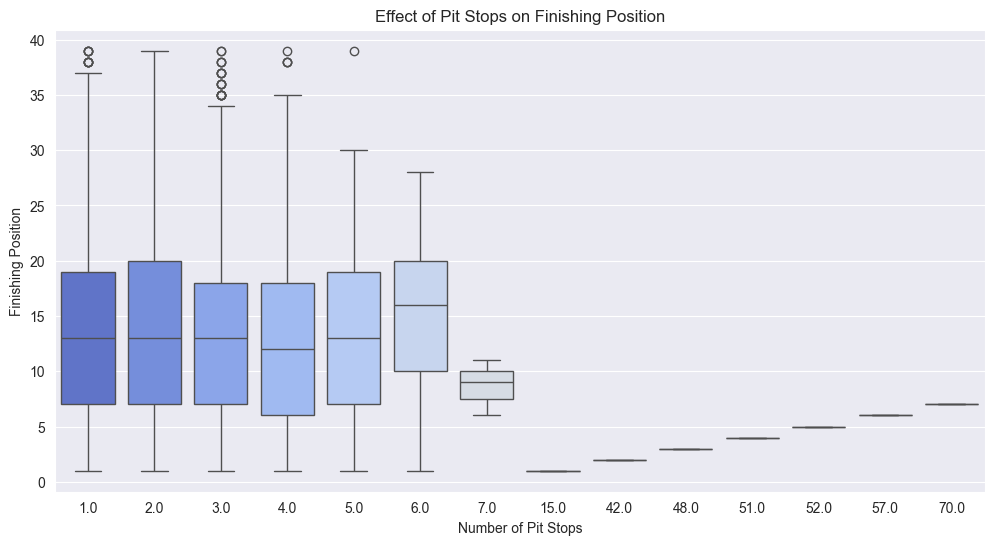

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataframes['pit_stops']['stop'], y=dataframes['results']['positionOrder'], palette="coolwarm")
plt.title("Effect of Pit Stops on Finishing Position")
plt.xlabel("Number of Pit Stops")
plt.ylabel("Finishing Position")
plt.show()


Top 10 Drivers by Total Points

In [ ]:
# Top drivers based on total points
# top_drivers = dataframes['driver_standings'].groupby("driverId")["points"].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="coolwarm")
# plt.title("Top 10 Drivers by Total Points")
# plt.xlabel("Driver ID")
# plt.ylabel("Total Points Earned")
# plt.show()


Total Race Wins by Constructor

In [ ]:
# plt.figure(figsize=(12, 6))
# wins_by_constructor = dataframes['constructor_standings'].groupby("constructorId")["wins"].sum().sort_values(ascending=False)
# sns.barplot(x=wins_by_constructor.index, y=wins_by_constructor.values, palette="Blues_r")
# plt.title("Total Race Wins by Constructor")
# plt.xlabel("Constructor ID")
# plt.ylabel("Wins")
# plt.xticks(rotation=90)
# plt.show()


Finishing Position vs. Qualifying Position

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=dataframes['results']['grid'], y=dataframes['results']['positionOrder'], alpha=0.5)
# plt.title("Finishing Position vs. Starting Grid Position")
# plt.xlabel("Starting Grid Position")
# plt.ylabel("Finishing Position")
# plt.show()


Top 10 Drivers by Wins

In [ ]:
# top_drivers = dataframes['driver_standings'].groupby("driverId")["wins"].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_drivers.index, y=top_drivers.values, palette="magma")
# plt.title("Top 10 Drivers by Wins")
# plt.xlabel("Driver ID")
# plt.ylabel("Total Wins")
# plt.show()


Constructor Dominance Over the Years

In [ ]:
# Total race wins by constructor over time
# constructor_wins = dataframes['constructor_standings'].groupby("constructorId")["wins"].sum().sort_values(ascending=False).head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=constructor_wins.index, y=constructor_wins.values, palette="viridis")
# plt.title("Top 10 Constructors by Total Wins")
# plt.xlabel("Constructor ID")
# plt.ylabel("Total Wins")
# plt.xticks(rotation=45)
# plt.show()


Relationship Between Qualifying Position & Race Finishing Position

In [ ]:
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=dataframes['results']['grid'], y=dataframes['results']['positionOrder'], alpha=0.5)
# plt.title("Finishing Position vs. Starting Grid Position")
# plt.xlabel("Starting Grid Position")
# plt.ylabel("Finishing Position")
# plt.show()


Lap Times Analysis

In [ ]:
# Convert lap time to numeric format
# dataframes['lap_times']['milliseconds'] = pd.to_numeric(dataframes['lap_times']['milliseconds'], errors='coerce')

# # Average lap time per driver
# avg_lap_times = dataframes['lap_times'].groupby("driverId")["milliseconds"].mean().sort_values().head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=avg_lap_times.index, y=avg_lap_times.values, palette="coolwarm")
# plt.title("Top 10 Fastest Drivers by Average Lap Time")
# plt.xlabel("Driver ID")
# plt.ylabel("Average Lap Time (ms)")
# plt.show()


 Pit Stop Strategy Impact

In [ ]:
# Pit stops count per driver
# pit_stops_per_driver = dataframes['pit_stops'].groupby("driverId")["stop"].count().sort_values(ascending=False).head(10)

# plt.figure(figsize=(12, 6))
# sns.barplot(x=pit_stops_per_driver.index, y=pit_stops_per_driver.values, palette="coolwarm")
# plt.title("Top 10 Drivers with Most Pit Stops")
# plt.xlabel("Driver ID")
# plt.ylabel("Total Pit Stops")
# plt.xticks(rotation=45)
# plt.show()
